## LogisticRegression

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
%matplotlib inline

逻辑回归(LogisticRegression)简单来看就是在线性回归模型外面再套了一个$Sigmoid$函数：  
$$
\delta(t)=\frac{1}{1+e^{-t}}


而将$t$替换为线性回归模型$w^Tx^*$（这里$x^*=[x^T,1]^T$）即可得到逻辑回归模型：  
$$
f(x)=\delta(w^Tx^*)=\frac{1}{1+e^{-(w^Tx^*)}}
$$  
我们可以发现：  
$Sigmoid$函数决定了模型的输出在$(0,1)$区间，所以逻辑回归模型可以用作区间在$(0,1)$的回归任务，也可以用作$\{0,1\}$的二分类任务；同样，由于模型的输出在$(0,1)$区间，所以逻辑回归模型的输出也可以看作这样的“概率”模型：  
$$
P(y=1\mid x)=f(x)\\
P(y=0\mid x)=1-f(x)
$$  
所以，逻辑回归的学习目标可以通过极大似然估计求解： 
$\prod_{j=1}^n f(x_j)^{y_j}(1-f(x_j))^{(1-y_j)}$，即使得观测到的当前所有样本的所属类别概率尽可能大；通过对该函数取负对数，即可得到交叉熵损失函数：  
$$
L(w)=-\sum_{j=1}^n y_j log(f(x_j))+(1-y_j)log(1-f(x_j))
$$  
这里$n$表示样本量，$x_j\in R^m$，$m$表示特征量，$y_j\in \{0,1\}$，接下来的与之前推导一样，通过梯度下降求解$w$的更新公式即可：  
$$
\frac{\partial L}{\partial w}=-\sum_{i=1}^n (y_i-f(x_i))x_i^*
$$  
所以$w$的更新公式：  
$$
w:=w-\eta \frac{\partial L}{\partial w}
$$

In [57]:
path = "../Data/Linearly_separable_dataset.mat"
Data = sio.loadmat(path)
Train = Data['train']
Test = Data['test']

X_train = np.c_[ Train[:,0:2], np.ones(Train.shape[0]) ]
Y_train = Train[:,2]
for i in range (Y_train.shape[0]):
    if Y_train[i] == -1:
        Y_train[i] = 0

        
X_test = np.c_[ Test[:,0:2], np.ones(Test.shape[0]) ]
Y_test = Test[:,2]
for i in range(Y_test.shape[0]):
    if Y_test[i] == -1:
        Y_test[i] = 0


Text(0.5, 1.0, 'Training set visualization')

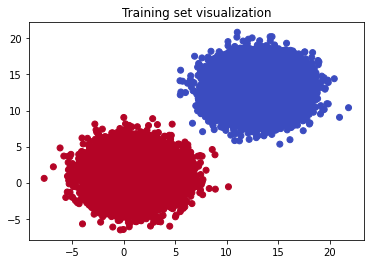

In [58]:
plt.figure()
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap='coolwarm')
plt.title("Training set visualization")

Sigmod函数

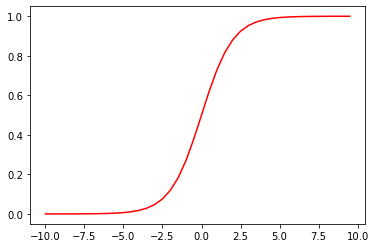

In [59]:
x = np.arange(-10,10,0.5)
y = 1/(1+np.exp(-x))
plt.figure()
plt.plot(x,y,c='r')
plt.show()

In [60]:
def f(x):
    
    y = 1/(1+np.exp(-x))
    return y


class Logistic (object):
    def __init__(self, feature_dim,batches, epochs=100,learning_rate=0.01):
        self.W = np.random.randn(feature_dim,1)
        self.batches = batches
        self.epochs = epochs
        self.lr = learning_rate
        

        
    def fit(self,x,y):
        for i in range(self.epochs):
            for j in range(len(y)//self.batches):
                x_batch = x[j*self.batches:(j+1)*self.batches,:]
                y_batch = y[j*self.batches:(j+1)*self.batches]
                tmp = f(x_batch@self.W)
                temp = -(y_batch-tmp)
                dw = temp.T@x_batch/self.batches
                self.W = self.W - self.lr*dw.T
                WW = self.W
                
        return WW    
ML = Logistic(3,4,100,0.01)
Y_train = np.reshape(Y_train, (Y_train.shape[0],1))
W = ML.fit(X_train,Y_train)   

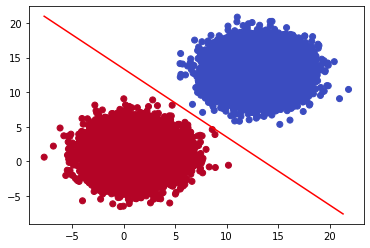

In [63]:
x1 = np.arange(np.min(X_train[:,0]),np.max(X_train[:,0]))
x2 = -(W[0,0]*x1+W[2,0])/W[1,0]
plt.figure()
plt.plot(x1,x2,c='r')
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap='coolwarm')